In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal
import random

import h5py

In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('../../../../nadavp/new_trap/Tools/')
sys.path.append('../../../../nadavp/new_trap/Tools/StatFramework/')
import BeadDataFile
from discharge_tools import *

In [4]:
%reload_ext autoreload
%autoreload 2

In [5]:
from likelihood_calculator import likelihood_analyser
from likelihood_calculator import GravityFramework
from likelihood_calculator import auxiliary_functions as aux
gfw = GravityFramework.GravityFramework()

In [23]:
gfw = GravityFramework.GravityFramework()

### Load data

In [6]:
foldername = r'/data/new_trap/20200107/Bead3/Discharge/'
bdf_discharge = load_dir(dirname=foldername)

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

In [9]:
bb = bdf_discharge[0]
response_x = [np.std(bb.response_at_freq('z',drive_freq=151)) for bb in bdf_discharge]

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


<IPython.core.display.Javascript object>


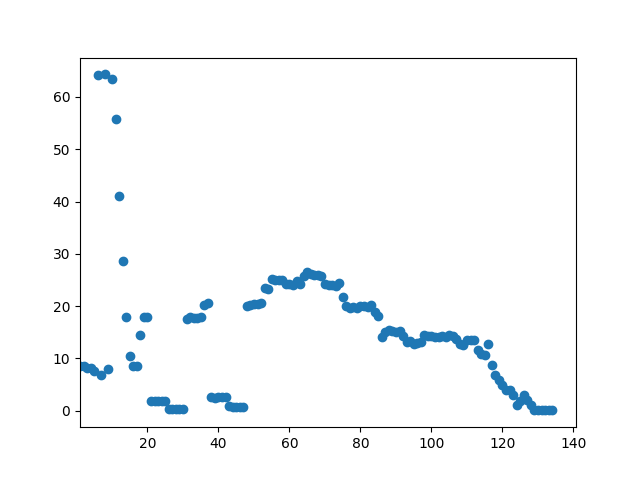

622.1951118233993


In [10]:
_, ax = plt.subplots()
ax.scatter(range(len(response_x)), response_x/response_x[128])
ax.set(xlim=(1,None))
print(response_x[48])

In [24]:
bdf_z = bdf_discharge[48:53]
bdf_x = bdf_discharge[38:43]
bdf_y = bdf_discharge[43:48]
charges = 20
m1s_z = gfw.build_z_response(bdf_z, drive_freq=151,charges=charges, bandwidth=2)
m1s_x = gfw.build_x_response(bdf_x, drive_freq=151,charges=charges)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
Z2-amplitude:  7.38e+03
reduced chi2:  9166.99214448988
***************************************************
Z2-amplitude:  7.44e+03
reduced chi2:  19272.66193102042
***************************************************
Z2-amplitude:  7.49e+03
reduced chi2:  26013.347879616565
***************************************************
Z2-amplitude:  7.52e+03
reduced chi2:  31248.20893704053
***************************************************
Z2-amplitude:  7.53e+03
reduced chi2:  38186.10711102207
Z2 response (amplitude): 7473.630290390829
***************************************************
X2-amplitude:  1.34e+02
reduced chi2:  12.25045844180057
***************************************************
X2-amplitude:  1.33e+02
reduced chi2:  9.685634443700467
***************************************************
X2-amplitude:  1.37e+02
reduced chi2:  14.498602847459116
***************************************************
X2-amplitude:  1.35e+02
reduced 

### Transfer function

In [15]:
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_X_1.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Y_2.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)
tf_list = [tf_x, tf_y, tf_z]

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


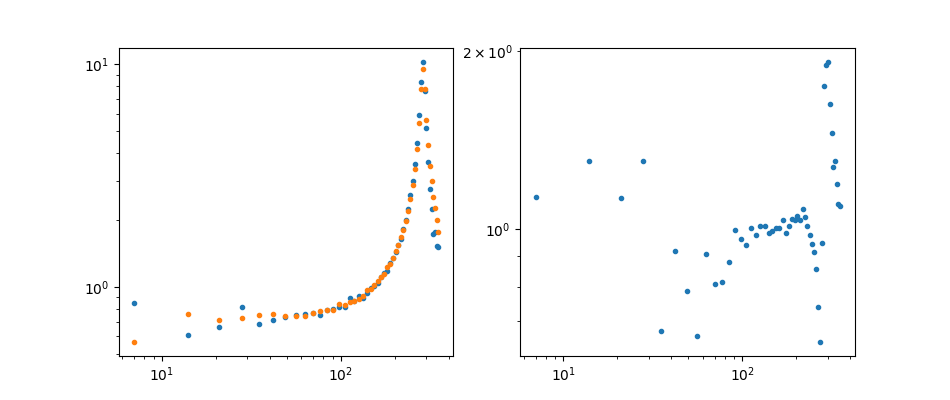

In [25]:
gfw.build_transfer_function(tf_list, plot=True)

In [26]:
# foldername = r'/data/new_trap/20200107/Bead3/InitialTest/'
foldername = r'/data/new_trap/20200107/Bead3/Shaking/Shaking380/'
datasets_num = 100
gfw.BDFs = load_dir(foldername, file_prefix='Shaking13',max_file=datasets_num)

No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height data
No height 

<IPython.core.display.Javascript object>


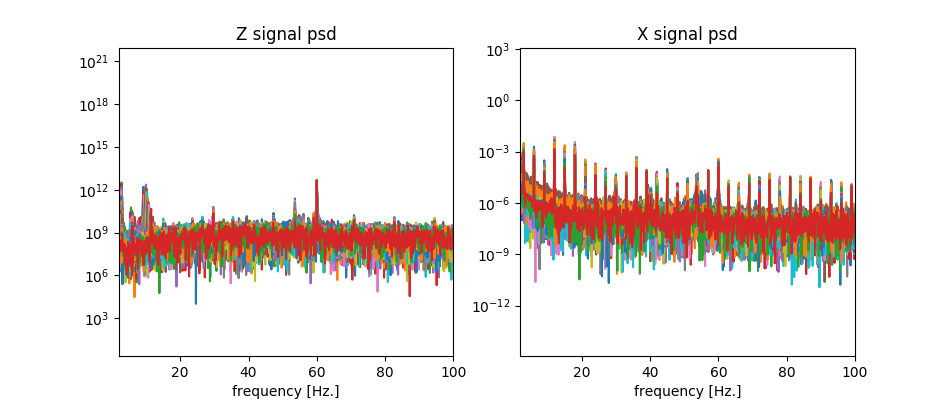

[(2, 100), Text(0.5, 0, 'frequency [Hz.]'), Text(0.5, 1.0, 'X signal psd')]

In [122]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True)
for bb in gfw.BDFs[32::2]:
    ax[0].semilogy(*bb.psd('z'))
    ax[1].semilogy(*bb.psd2('x'))
ax[0].set(xlim=(2,100),xlabel='frequency [Hz.]', title='Z signal psd')
ax[1].set(xlim=(2,100),xlabel='frequency [Hz.]', title='X signal psd')

In [12]:
gfw.build_noise_array(sideband_freq=20, bandwidth=1)
gfw.build_noise_array_z(sideband_freq=20, bandwidth=1)

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


x2 noise rms:  0.32614027358654896
x3 noise rms:  0.07239215854707944
z2 noise rms:  17.464442695545255


In [43]:
fit_kwargs = {'alpha': 1e-2, 'phase': 0, 'error_alpha': 0.01, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [1e-5, 10], 'limit_phase': [-5000,5000],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
min_18_z2 = []
datasets_num = 100
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    min_18_z2.append(gfw.get_alpha_2d(bdf=bb, center_freq=14, bandwidth=16, direction1='z', direction2='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, decimate=100, suppress_print=False,
                          **fit_kwargs)[2])

0 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.71e-03
reduced chi2:  1086.4598055732702
1 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.17e-03
reduced chi2:  651.3946972701125
2 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for la

/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha:  6.14e-03
reduced chi2:  578.4935474685274
6 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.46e-03
reduced chi2:  660.0627783891165
7 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  7.24e-03
reduced chi2:  725.5518311886682
8 / 100
Separation (face

***************************************************
alpha:  1.41e-02
reduced chi2:  1106.424779137182
30 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.80e-02
reduced chi2:  1395.5816969042398
31 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.14e-02
reduced chi2:  1830.0526400719295
32 / 100
Separation 

Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  5.10e-03
reduced chi2:  964.4662222884447
54 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.28e-02
reduced chi2:  1468.7074582447383
55 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 

***************************************************
alpha:  7.89e-03
reduced chi2:  282.18570006839855
77 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  2.40e-03
reduced chi2:  200.0638243637303
78 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.55e-03
reduced chi2:  256.76212613998837
79 / 100
Separation 

<IPython.core.display.Javascript object>


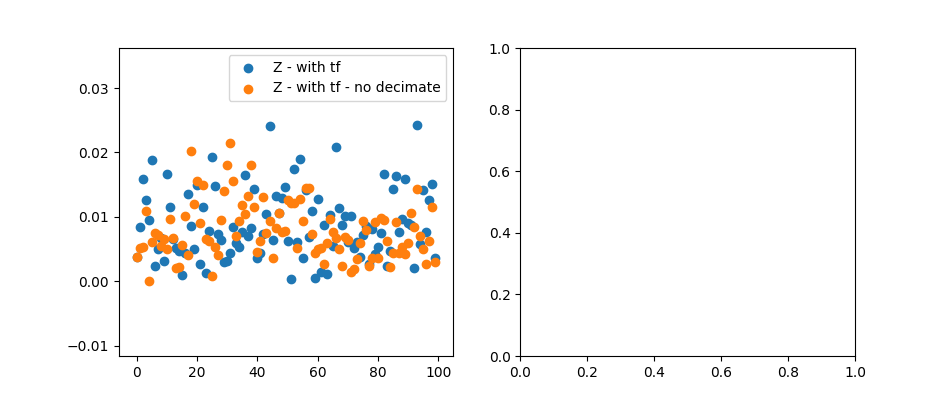

z only - mean:  0.008814841086397199 , std:  337767.67674132326
z only - mean:  0.008814841086397199 , std:  273695.983234959


In [44]:
# m_x2 = [m_.values[0] for m_ in min_20_x2]
m_z = [m_.values[0] for m_ in min_18_z]
m_z2 = [m_.values[0] for m_ in min_18_z2]

# m_x3 = [m_.values[0] for m_ in min_20_x3]

_,ax = plt.subplots(1,2,figsize=(9.5,4))
# ax[0].scatter(range(100), m_x2, label='X2 only')
# ax[0].scatter(range(100), m_x3, label='X3 only')
ax[0].scatter(range(100), m_z, label='Z - with tf')
ax[0].scatter(range(100), m_z2, label='Z - with tf - no decimate')
ax[0].legend()

# ax[1].scatter(m_x2, m_z)

# print('x2 only - mean: ', np.mean(m_x2), ', std: ', np.std(m_x2))
# print('x3 only - mean: ', np.mean(m_x2), ', std: ', np.std(m_x3))
print('z only - mean: ', np.mean(m_z), ', std: ', np.std(m_z)*2*1e10/np.sqrt(1e5))
print('z only - mean: ', np.mean(m_z), ', std: ', np.std(m_z2)*2*1e10/np.sqrt(1e5))

In [106]:
m_noise_xx = [m_.values[0] for m_ in min_3_6_xx]

<IPython.core.display.Javascript object>


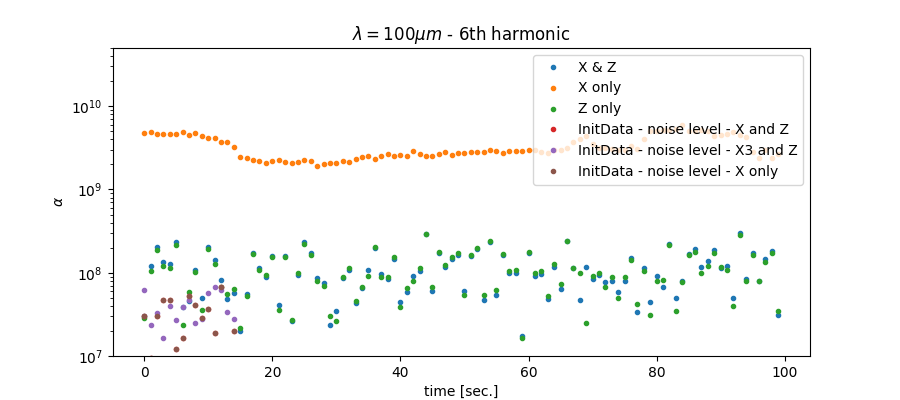

mean alpha (all):  0.011011721321739585 std:  0.006202859498670212
mean alpha (X-only):  0.33172914416158017 std:  0.10375595476105456
mean alpha (Z-only):  0.01075695602593762 std:  0.006110601362293406
mean alpha noise (Z-only):  0.0031017019021576564 std:  0.00619360483794931


In [107]:
_, ax = plt.subplots(figsize=(9,4))
ax.semilogy(np.arange(100), np.array(m_3_6)*1e10, '.', label=r'X & Z')
ax.semilogy(np.arange(100), np.array(m_3_6_x)*1e10, '.', label=r'X only')
ax.semilogy(np.arange(100), np.array(m_3_6_z)*1e10, '.', label=r'Z only')
ax.semilogy(np.arange(15), np.array(m_noise[-15:])*1e10, '.', label=r'InitData - noise level - X and Z')
ax.semilogy(np.arange(15), np.array(m_noise_zx3[-15:])*1e10, '.', label=r'InitData - noise level - X3 and Z')
ax.semilogy(np.arange(15), np.array(m_noise_xx[-15:])*1e10, '.', label=r'InitData - noise level - X only')
ax.set(ylim=(1e7,5e10), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $ - 6th harmonic')
ax.legend()
print('mean alpha (all): ', np.mean(m_3_6), 'std: ', np.std(m_3_6))
print('mean alpha (X-only): ', np.mean(m_3_6_x), 'std: ', np.std(m_3_6_x))
print('mean alpha (Z-only): ', np.mean(m_3_6_z), 'std: ', np.std(m_3_6_z))
print('mean alpha noise (Z-only): ', np.mean(m_noise[-15:]), 'std: ', np.std(m_3_6_z[-15:]))

<IPython.core.display.Javascript object>


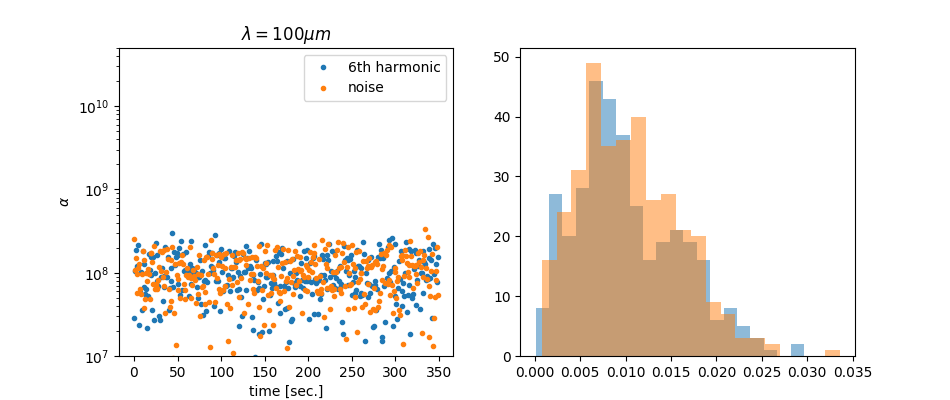

(array([16., 24., 31., 49., 35., 36., 40., 26., 27., 21., 20.,  9.,  7.,
         3.,  3.,  2.,  0.,  0.,  0.,  1.]),
 array([0.00075839, 0.00239923, 0.00404007, 0.00568091, 0.00732175,
        0.00896259, 0.01060343, 0.01224427, 0.01388511, 0.01552595,
        0.01716679, 0.01880763, 0.02044847, 0.02208931, 0.02373014,
        0.02537098, 0.02701182, 0.02865266, 0.0302935 , 0.03193434,
        0.03357518]),
 <a list of 20 Patch objects>)

In [109]:
_, ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].semilogy(np.arange(350), np.array(m_3_5)*1e10, '.', label=r'6th harmonic')
ax[0].semilogy(np.arange(350), np.array(m_3_noise)*1e10, '.', label=r'noise')
ax[0].set(ylim=(1e7,5e10), xlabel='time [sec.]', ylabel=r'$\alpha$', title=r'$\lambda=100 \mu m $')
ax[0].legend()
ax[1].hist(m_3_5,bins=20,alpha=0.5)
ax[1].hist(m_3_noise,bins=20,alpha=0.5)

In [117]:
print('6th hsrmonic mean: ',np.mean(m_3_5), ' error: ', np.std(m_3_5)/np.sqrt(350))
print('noise mean: ',np.mean(m_3_noise), ' error: ', np.std(m_3_noise)/np.sqrt(350))
print('estimated limit: ', format(np.std(m_3_5)/np.sqrt(350)*2*1e10,"5.2e"))

6th hsrmonic mean:  0.010176552255184384  error:  0.0003071952786798577
noise mean:  0.010498701965504337  error:  0.0002957590986695374
estimated limit:  6.14e+06


### profile likelihood

In [13]:
fit_kwargs = {'alpha': 1e-2, 'phase': 0, 'error_alpha': 0.01, 'error_phase': 1,
              'errordef': 1,
              'limit_alpha': [1e-5, 10], 'limit_phase': [-5000,5000],
              'fix_alpha': False, 'fix_phase': False, 'print_level': 0}
min_18_x3 = []
datasets_num = 100
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    min_18_x3.append(gfw.get_alpha_2d(bdf=bb, center_freq=18, bandwidth=1, direction1='z', direction2='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs)[2])

0 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha:  2.92e-03
reduced chi2:  359.46162471462384
1 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.06e-02
reduced chi2:  220.1641486041576
2 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.87e-02
reduced chi2:  537.7147441920262
3 / 100
Separation (fac

***************************************************
alpha:  9.38e-03
reduced chi2:  419.0227888809367
20 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.55e-02
reduced chi2:  432.64612516624646
21 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.65e-03
reduced chi2:  661.8515671154867
22 / 100
Separation (

***************************************************
alpha:  9.09e-03
reduced chi2:  600.6378592509362
39 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.55e-02
reduced chi2:  574.023213128228
40 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  3.61e-03
reduced chi2:  196.04637296889757
41 / 100
Separation (f

***************************************************
alpha:  1.06e-02
reduced chi2:  170.19194714899473
58 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.08e-02
reduced chi2:  125.6117187574564
59 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.37e-03
reduced chi2:  391.84949929706164
60 / 100
Separation 

***************************************************
alpha:  1.45e-02
reduced chi2:  231.39801262630468
77 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  4.25e-03
reduced chi2:  296.31673747864073
78 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.06e-02
reduced chi2:  172.52435119930138
79 / 100
Separation

***************************************************
alpha:  1.64e-02
reduced chi2:  257.170244985259
96 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  8.38e-03
reduced chi2:  201.96108408284263
97 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha:  1.37e-02
reduced chi2:  149.42550033120992
98 / 100
Separation (

In [17]:
fit_kwargs = {'alpha': 1e-2, 'phase': 0, 'sigma': 17.4, 'error_alpha': 0.01, 'error_phase': 1, 'error_sigma': 1,
              'errordef': 1,
              'limit_alpha': [1e-5, 10], 'limit_phase': [-5000,5000], 'limit_sigma': [0.1,500],
              'fix_alpha': False, 'fix_phase': False, 'fix_sigma': False, 'print_level': 0}
min_18_z = []
datasets_num = 100
for i,bb in enumerate(gfw.BDFs):
    print(i,'/',datasets_num)
    min_18_z.append(gfw.get_alpha_mle_pl(bdf=bb, center_freq=18, noise_freq=20, bandwidth=1, direction1='z',
                          x_focous=389.0, frequency=3, lambda_par=0.0001, height=6e-6, suppress_print=False,
                          **fit_kwargs)[2])

0 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected


/home/analysis_user/.local/lib/python3.6/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


***************************************************
alpha mle:  2.92e-03
reduced chi2:  5.8755605244874864
1 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.06e-02
reduced chi2:  5.419668403475437
2 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.86e-02
reduced chi2:  6.084634039640263
3 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.22e-02
reduced 

***************************************************
alpha mle:  7.99e-03
reduced chi2:  5.673331757177607
28 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.97e-03
reduced chi2:  5.777094684114205
29 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.18e-03
reduced chi2:  5.698643639098152
30 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.77e-03
reduce

***************************************************
alpha mle:  2.37e-02
reduced chi2:  5.803318568116298
55 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  6.22e-03
reduced chi2:  5.965013541680025
56 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  8.71e-03
reduced chi2:  5.85839086867087
57 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  1.06e-02
reduced

***************************************************
alpha mle:  8.63e-03
reduced chi2:  5.967291054598909
82 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  2.16e-02
reduced chi2:  5.864936121116575
83 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  3.49e-03
reduced chi2:  5.345576492879662
84 / 100
Separation (face to face):  6.5
Stroke:  100
Time:  10.0
Your choice of lambda is not existing
Taking 1.00e-04 for lambda
A separation of 6.50e-06 is selected
A height of 6.00e-06 is selected
***************************************************
alpha mle:  7.92e-03
reduce

<IPython.core.display.Javascript object>


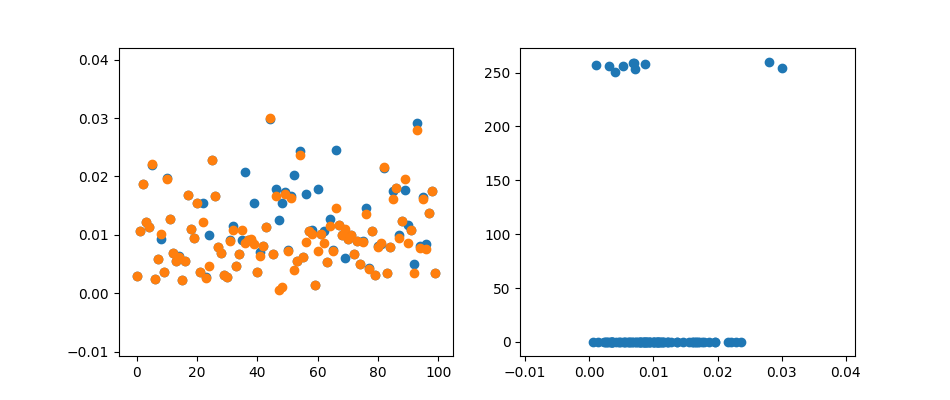

In [26]:
m_z_ls = [m_.values[0] for m_ in min_18_x3]
m_z_pl = [m_.values[0] for m_ in min_18_z]
m_z_pl_sigma = [m_.errors[2] for m_ in min_18_z]

_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].scatter(range(100), np.array(m_z_ls))
ax[0].scatter(range(100), np.array(m_z_pl))
ax[1].scatter(m_z_pl, m_z_pl_sigma)


In [58]:
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_X_1.h5'
tf_x = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Y_2.h5'
tf_y = BeadDataFile.BeadDataFile(fname=fname)
fname = r'/data/new_trap/20200107/Bead3/TransFunc/TransFunc_Z_3.h5'
tf_z = BeadDataFile.BeadDataFile(fname=fname)

No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data
No height data
No cantilever data
Error loading spinning data


<IPython.core.display.Javascript object>


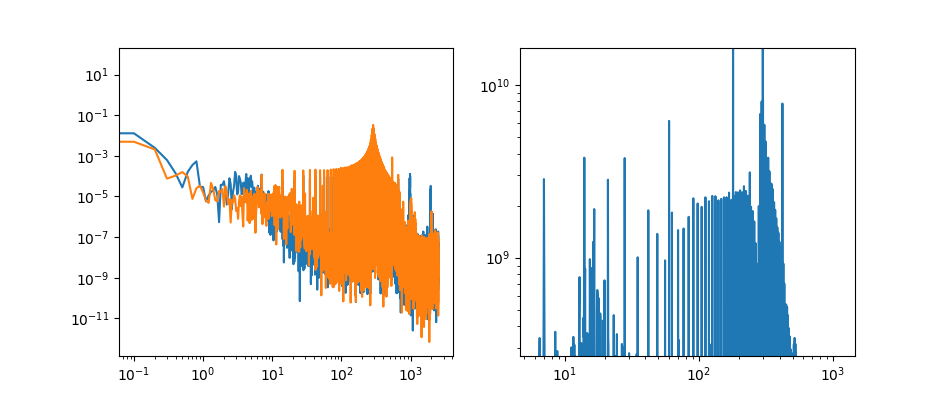

In [59]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(*tf_x.psd2('x'))
ax[0].loglog(*tf_y.psd2('y'))
ax[1].loglog(*tf_z.psd2('z'))

<IPython.core.display.Javascript object>


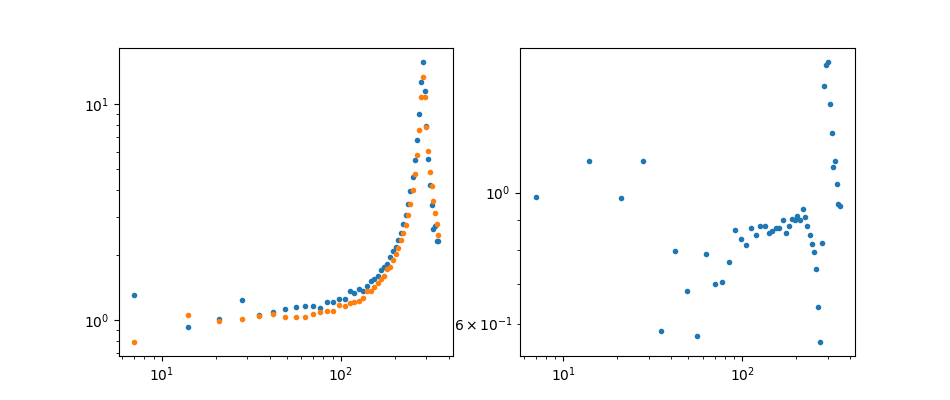

In [116]:
freq, fft = tf_x.psd2('x')
freqs = [freq==7*i for i in range(1,50)]
bbb = [i==1 for i in np.sum(freqs,axis=0)]
freq[bbb]
build_transfer_function([tf_x,tf_y,tf_z], plot=True, scale_freq=20)